<a href="https://colab.research.google.com/github/snehachavhan2004/MLfromscratch/blob/main/pca.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import numpy as np
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

In [1]:
def standardize(X):
    """Standardize the dataset X."""
    mean = np.mean(X, axis=0)
    std_dev = np.std(X, axis=0)
    return (X - mean) / std_dev

In [2]:
def covariance_matrix(X):
    """Compute the covariance matrix for the dataset X."""
    n_samples = X.shape[0]
    return np.dot(X.T, X) / (n_samples - 1)

In [3]:
def pca(X, k):
    """Perform PCA on the dataset X and return the top k components."""
    # Step 1: Standardize the dataset
    X_standardized = standardize(X)

    # Step 2: Compute the covariance matrix
    cov_matrix = covariance_matrix(X_standardized)

    # Step 3: Compute the eigenvalues and eigenvectors
    eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

    # Step 4: Sort the eigenvectors by decreasing eigenvalues
    sorted_indices = np.argsort(eigenvalues)[::-1]
    sorted_eigenvalues = eigenvalues[sorted_indices]
    sorted_eigenvectors = eigenvectors[:, sorted_indices]

    # Step 5: Select the top k eigenvectors to form a new basis
    top_eigenvectors = sorted_eigenvectors[:, :k]

    # Step 6: Transform the original dataset
    X_pca = np.dot(X_standardized, top_eigenvectors)

    return X_pca, sorted_eigenvalues, top_eigenvectors

In [6]:
# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target
target_names = iris.target_names

In [7]:
# Perform PCA
k = 2  # Number of principal components
X_pca, eigenvalues, eigenvectors = pca(X, k)

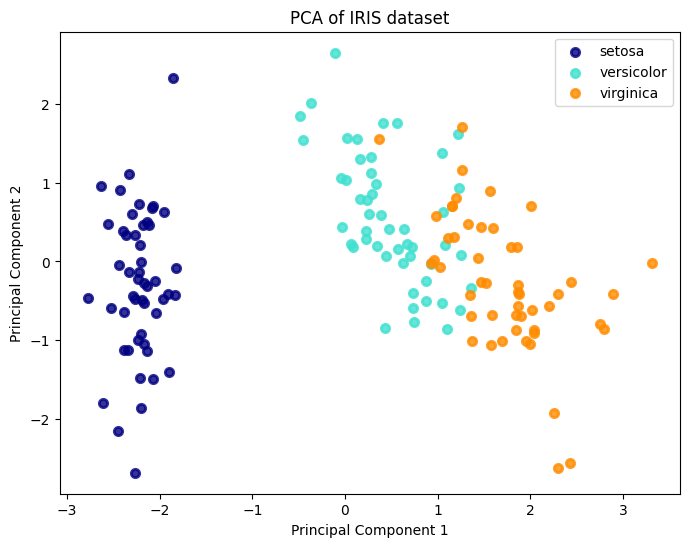

In [8]:

# Plot the PCA results
plt.figure(figsize=(8, 6))
colors = ['navy', 'turquoise', 'darkorange']
lw = 2

for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(X_pca[y == i, 0], X_pca[y == i, 1], color=color, alpha=.8, lw=lw,
                label=target_name)

plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA of IRIS dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()